In [1]:
!python --version

Python 3.10.6


In [2]:
# from polygon import RESTClient
import polygon
import statistics as st

API_KEY = "gonFkCTvp9gA48a1p5b9ynIaAPohFHC4"

client = polygon.OptionsClient(api_key= API_KEY)
stock_client = polygon.StocksClient(api_key= API_KEY)

In [3]:
from datetime import datetime, timedelta

# def get_option_ticker(ticker: str, strike_price: int, option_type: str, year: int, month: int, day: int) -> str:
#     strike_price_str = str(strike_price) + "000"
#     while len(strike_price_str) < 8:
#         strike_price_str = "0" + strike_price_str
#     return ticker + dt.datetime(year, month, day).strftime("%y%m%d") + option_type + strike_price_str

TIMESTAMP_CONVERSION_RATE=1/1000000000

def get_option_ticker(ticker: str, strike_price: int, option_type: str, expiry_date: datetime) -> str:
    return polygon.build_option_symbol(ticker, expiry_date, option_type, strike_price)

def get_time_stamp(year: int, month: int, day: int, hour: int, minute: int) -> int:
    return int(datetime.timestamp(datetime(year, month, day, hour, minute))/TIMESTAMP_CONVERSION_RATE)

def get_snapshot(client, ticker_dict: dict):
    snapshot = client.get_snapshot(ticker_dict['ticker'], get_option_ticker(**ticker_dict))
    
    return snapshot if snapshot['status'] == 'OK' else None

def get_ticker_dict(ticker: str, strike_price: int, option_type: str, expiry_date: datetime) -> dict:
    ticker_dict = {
        "ticker": ticker,
        "strike_price": strike_price,
        "option_type": option_type,
        "expiry_date": expiry_date
    }
    return ticker_dict

def generate_ticker_dict_list(ticker: str, strike_price: int, option_type: str, start_expiry_date: datetime, end_expiry_date: datetime) -> list:
    option_list =[]
    curr_datetime = start_expiry_date
    while (curr_datetime < end_expiry_date):
        option_list.append(get_ticker_dict(ticker, strike_price, option_type, curr_datetime))
        curr_datetime += timedelta(days = 1)
    return option_list

def generate_snapshot_list(client, option_dict_list: list) -> list:
    snapshot_list = []
    for option in option_dict_list:
        snapshot = get_snapshot(client, option)
        if snapshot is not None:
            snapshot_list.append(snapshot)
        # print(snapshot_list)
    return snapshot_list

In [4]:
ticker_dict = {
    "ticker" : "SPY",
    "strike_price" : 540,
    "option_type" : "C",
    "expiry_date" : datetime(2024, 9, 11)
}

option_ticker2 = get_option_ticker(**ticker_dict)
print(option_ticker2)

SPY240911C00540000


In [ ]:
# # n = 0
# # print(client.get_quotes(option_ticker2))
# ask_price = []
# bid_price = []
# timestamp_lte = get_time_stamp(2024, 8, 15, 4, 15)
# timestamp_gte = get_time_stamp(2024, 8, 15, 4, 14)
# print(f"{timestamp_gte:0f} <= time range <= {timestamp_lte:0f}")
# # print(client.get_quotes(option_ticker2, limit=50000)["results"])
# quotes_dict = client.get_quotes(option_ticker2, timestamp_lt = timestamp_lte, timestamp_gt = timestamp_gte,limit=50000)
# # print(quotes_dict)
# # print(option_ticker2)
# for q in quotes_dict["results"]:
#     # print(f"{n} : {datetime.fromtimestamp(q['sip_timestamp']*TIMESTAMP_CONVERSION_RATE)}: ask_price = {q['ask_price']}, bid_price={q['bid_price']}")
#     # print(q)
#     ask_price.append(q['ask_price'])
#     bid_price.append(q['bid_price'])
#     # n += 1
    
# print(f"ask : min-> {min(ask_price)} max-> {max(ask_price)} bid : min-> {min(bid_price)} max-> {max(bid_price)}")
# print(f"mean_bid : {st.fmean(bid_price)}, mean_ask : {st.fmean(ask_price)}")
# print(f"median_bid : {st.median(bid_price)}, median_ask : {st.median(ask_price)}")
# print(f"mode_bid : {st.mode(bid_price)}, mode_ask : {st.mode(ask_price)}")

In [5]:
snapshot = get_snapshot(client, ticker_dict)
print(snapshot)

None


In [6]:
option_generator_dict= {
    "ticker" : "SPY",
    "strike_price" : 540,
    "option_type" : "C",
    "start_expiry_date" : datetime.now(),
    "end_expiry_date" : datetime(2026, 12, 18)
}

option_dict_list = generate_ticker_dict_list(**option_generator_dict)
# print(len(option_dict_list))
# print(option_dict_list)
option_snapshot_list = generate_snapshot_list(client, option_dict_list)
print(option_snapshot_list)

[{'results': {'break_even_price': 554.595, 'day': {'change': 1.59, 'change_percent': 12.193, 'close': 14.63, 'high': 14.9, 'last_updated': 1723780800000000000, 'low': 11.52, 'open': 12.07, 'previous_close': 13.04, 'volume': 1255, 'vwap': 13.6352}, 'details': {'contract_type': 'call', 'exercise_style': 'american', 'expiration_date': '2024-08-19', 'shares_per_contract': 100, 'strike_price': 540, 'ticker': 'O:SPY240819C00540000'}, 'greeks': {'delta': 0.9635989704009267, 'gamma': 0.00963047707199038, 'theta': -0.18054306577569887, 'vega': 0.046339913889826494}, 'implied_volatility': 0.17401343207230346, 'last_quote': {'ask': 14.73, 'ask_size': 101, 'ask_exchange': 325, 'bid': 14.46, 'bid_size': 103, 'bid_exchange': 325, 'last_updated': 1723839298465566464, 'midpoint': 14.595, 'timeframe': 'REAL-TIME'}, 'last_trade': {'sip_timestamp': 1723839080275844864, 'conditions': [232], 'price': 14.63, 'size': 1, 'exchange': 308, 'timeframe': 'REAL-TIME'}, 'open_interest': 4333, 'underlying_asset': {'

In [7]:
print(option_snapshot_list[0])

{'results': {'break_even_price': 554.595, 'day': {'change': 1.59, 'change_percent': 12.193, 'close': 14.63, 'high': 14.9, 'last_updated': 1723780800000000000, 'low': 11.52, 'open': 12.07, 'previous_close': 13.04, 'volume': 1255, 'vwap': 13.6352}, 'details': {'contract_type': 'call', 'exercise_style': 'american', 'expiration_date': '2024-08-19', 'shares_per_contract': 100, 'strike_price': 540, 'ticker': 'O:SPY240819C00540000'}, 'greeks': {'delta': 0.9635989704009267, 'gamma': 0.00963047707199038, 'theta': -0.18054306577569887, 'vega': 0.046339913889826494}, 'implied_volatility': 0.17401343207230346, 'last_quote': {'ask': 14.73, 'ask_size': 101, 'ask_exchange': 325, 'bid': 14.46, 'bid_size': 103, 'bid_exchange': 325, 'last_updated': 1723839298465566464, 'midpoint': 14.595, 'timeframe': 'REAL-TIME'}, 'last_trade': {'sip_timestamp': 1723839080275844864, 'conditions': [232], 'price': 14.63, 'size': 1, 'exchange': 308, 'timeframe': 'REAL-TIME'}, 'open_interest': 4333, 'underlying_asset': {'c

In [8]:
bid_price = []
ask_price = []
delta = []
gamma = []
theta = []
vega = []
iv = []
expiry_date = []

for snapshot in option_snapshot_list:
    bid_price.append(snapshot['results']['last_quote']['bid'])
    ask_price.append(snapshot['results']['last_quote']['ask'])
    delta.append(snapshot['results']['greeks']['delta'])
    gamma.append(snapshot['results']['greeks']['gamma'])
    theta.append(snapshot['results']['greeks']['theta'])
    vega.append(snapshot['results']['greeks']['vega'])
    iv.append(snapshot['results']['implied_volatility'])
    expiry_date.append(snapshot['results']['details']['expiration_date'])

In [13]:
# print(bid_price)
# print(ask_price)
# print(delta)
# print(gamma)
# print(theta)
# print(vega)
# print(iv)
# print(expiry_date)

print(expiry_date[:-1])

#sample = datetime.strptime(expiry_date[:-1], '%Y-%m-%d')
sample = [datetime.strptime(date, '%Y-%m-%d') for date in expiry_date[:-1]]
#diff = sample - datetime.now()
diff = [date - datetime.now() for date in sample]
print(diff)

['2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-06', '2024-09-13', '2024-09-20', '2024-09-27', '2024-09-30', '2024-10-18', '2024-10-31', '2024-11-15', '2024-11-29', '2024-12-20', '2024-12-31', '2025-01-17', '2025-01-31', '2025-03-21', '2025-03-31', '2025-04-17', '2025-06-20', '2025-06-30', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16']
[datetime.timedelta(days=1, seconds=30547, microseconds=437826), datetime.timedelta(days=2, seconds=30547, microseconds=437822), datetime.timedelta(days=3, seconds=30547, microseconds=437822), datetime.timedelta(days=4, seconds=30547, microseconds=437821), datetime.timedelta(days=5, seconds=30547, microseconds=437820), datetime.timedelta(days=8, seconds=30547, microseconds=437820), datetime.timedelta(days=9, seconds=30547, microseconds=437819), datetime.timedelta(days=10, seconds=30547, microseconds=437818), datetime.timedelta(days=11, seconds=3

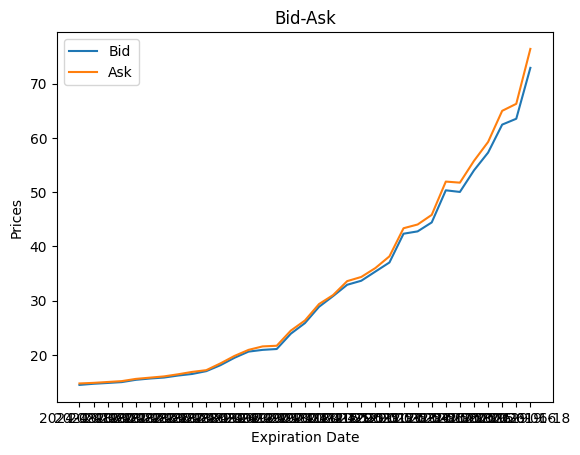

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(expiry_date, bid_price, label='Bid')
ax.plot(expiry_date, ask_price, label='Ask')

ax.set_xlabel('Expiration Date')
ax.set_ylabel('Prices')
ax.set_title('Bid-Ask')
ax.legend()
plt.show()

In [16]:
def get_daily(client, option_dict : dict, date_of: datetime):
    ticker_str = get_option_ticker(**option_dict)
    # print(ticker_str)
    return client.get_daily_open_close(ticker_str, date_of)

In [17]:
date_of_daily = datetime(2024, 1, 3)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)

Historical Price: 470.43
{'ticker': 'SPY', 'strike_price': 471, 'option_type': 'C', 'expiry_date': datetime.datetime(2024, 1, 4, 0, 0)}
{'status': 'OK', 'from': '2024-01-03', 'symbol': 'O:SPY240104C00471000', 'open': 1.37, 'high': 1.55, 'low': 0.36, 'close': 0.42, 'volume': 142419, 'afterHours': 0.45, 'preMarket': 1.37}


In [18]:
date_of_daily = datetime(2023, 1, 4)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)


Historical Price: 383.18
{'ticker': 'SPY', 'strike_price': 384, 'option_type': 'C', 'expiry_date': datetime.datetime(2023, 1, 5, 0, 0)}
{'status': 'OK', 'from': '2023-01-04', 'symbol': 'O:SPY230105C00384000', 'open': 2.22, 'high': 3.46, 'low': 0.71, 'close': 1.49, 'volume': 70546, 'afterHours': 1.58, 'preMarket': 2.22}


In [19]:
date_of_daily = datetime(2022, 12, 7)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)

Historical Price: 392.94
{'ticker': 'SPY', 'strike_price': 393, 'option_type': 'C', 'expiry_date': datetime.datetime(2022, 12, 8, 0, 0)}
{'status': 'OK', 'from': '2022-12-07', 'symbol': 'O:SPY221208C00393000', 'open': 2.42, 'high': 3.9, 'low': 1.48, 'close': 1.78, 'volume': 87274, 'afterHours': 1.9, 'preMarket': 2.42}


In [20]:
date_of_daily = datetime(2022, 6, 7)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)

Historical Price: 408.1
{'ticker': 'SPY', 'strike_price': 409, 'option_type': 'C', 'expiry_date': datetime.datetime(2022, 6, 8, 0, 0)}
{'status': 'OK', 'from': '2022-06-07', 'symbol': 'O:SPY220608C00409000', 'open': 2.55, 'high': 7.33, 'low': 2.33, 'close': 6.64, 'volume': 23976, 'afterHours': 6.77, 'preMarket': 2.55}


In [21]:
date_of_daily = datetime(2022, 1, 27)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)

Historical Price: 438.26
{'ticker': 'SPY', 'strike_price': 439, 'option_type': 'C', 'expiry_date': datetime.datetime(2022, 1, 28, 0, 0)}
{'status': 'OK', 'from': '2022-01-27', 'symbol': 'O:SPY220128C00439000', 'open': 3.97, 'high': 5.91, 'low': 0.68, 'close': 0.93, 'volume': 60522, 'afterHours': 0.75, 'preMarket': 3.97}


In [22]:
date_of_daily = datetime(2022, 1, 12)

ticker = "SPY"
historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
strike_price = int(historical_price['open']) + 1
option_type = "C"
expiry_date = date_of_daily + timedelta(days=1)

tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
print(f"Historical Price: {historical_price['open']}")
print(tick_dict)
daily = get_daily(client, tick_dict, date_of_daily)
print(daily)



Historical Price: 471.59
{'ticker': 'SPY', 'strike_price': 472, 'option_type': 'C', 'expiry_date': datetime.datetime(2022, 1, 13, 0, 0)}
{'status': 'NOT_FOUND', 'request_id': '4ab88434ea0aabae0924eee94efcdb5e', 'message': 'Data not found.'}


In [23]:
def check_if_daily_exists(client, ticker: str, date_of_daily: datetime, option_type: str) -> bool:
    historical_price = stock_client.get_daily_open_close(ticker, date_of_daily)
    if historical_price['status'] == 'NOT_FOUND':
        return False
    strike_price = int(historical_price['open']) + 1
    expiry_date = date_of_daily + timedelta(days=1)
    
    tick_dict = get_ticker_dict(ticker, strike_price, option_type, expiry_date)
    daily = get_daily(client, tick_dict, date_of_daily)
    return True if daily['status'] == 'OK' else False

In [24]:
curr_datetime = datetime(2014, 12, 30)
ticker = "SPY"
option_type = "C"
date_list = []
while True:
    check = check_if_daily_exists(client, ticker, curr_datetime, option_type)
    # print(f"{curr_datetime.date()} : {check}")
    if check is True:
        date_list.append(curr_datetime.date())
        print(f"{curr_datetime.date()} : {check}")
    curr_datetime -= timedelta(days=1)

2014-12-30 : True
2014-12-19 : True
2014-12-11 : True
2014-12-04 : True
2014-11-21 : True
2014-11-13 : True
2014-11-06 : True
2014-10-30 : True
2014-10-23 : True
2014-10-17 : True
2014-10-09 : True
2014-10-02 : True
2014-09-29 : True
2014-09-25 : True
2014-09-19 : True
2014-09-11 : True
2014-09-04 : True
2014-08-28 : True
2014-08-21 : True
2014-08-15 : True
2014-08-07 : True
2014-07-31 : True
2014-07-24 : True
2014-07-18 : True
2014-07-10 : True
2014-07-02 : True
2014-06-26 : True
2014-06-20 : True
2014-06-12 : True
2014-06-05 : True


KeyboardInterrupt: 

In [ ]:
import calendar

for noDate in date_list:
    print(f"{noDate} : {calendar.day_name[noDate.weekday()]}")

In [ ]:
print(datetime.now() - datetime(2022, 11, 14))